# ตรวจสอบไฟล์ CSV  

In [1]:
import pandas as pd

In [2]:
# อ่าน File CSV
Housing_dataset = pd.read_csv('/content/housing_price_dataset.csv', delimiter=',')
Housing_dataset

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [3]:
# เช็คประเภทของค่า
Housing_dataset.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [4]:
# ทำการเปลื่ยน Field Neighborhood จาก string เป็น int
replacement_dict = {'Rural': 1, 'Urban': 2, 'Suburb': 3}
Replace_Housing_dataset = Housing_dataset
Replace_Housing_dataset['Neighborhood'] = Replace_Housing_dataset['Neighborhood'].replace(replacement_dict)

In [5]:
# บันทึก csv ค่าที่เปลื่ยนแล้ว
new_file_path = 'updated_housing_price_dataset.csv'
Replace_Housing_dataset.to_csv(new_file_path, index=False)

In [6]:
# อ่านไฟล์ csv ใหม่
Replace_Housing_dataset = pd.read_csv('/content/updated_housing_price_dataset.csv', delimiter=',')
Replace_Housing_dataset

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,1,1969,215355.283618
1,2459,3,2,1,1980,195014.221626
2,1860,2,1,3,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,3,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,1,1975,100080.865895
49996,2854,2,2,3,1988,374507.656727
49997,2979,5,3,3,1962,384110.555590
49998,2596,5,2,1,1984,380512.685957


# การเตรียมข้อมูลสำหรับการฝึกโมเดล

In [7]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.5 MB/s eta 0:00:00


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score
import numpy as np

In [9]:
# test_size=0.1 หมายถึงการแบ่งข้อมูลให้ชุดทดสอบมีขนาด 10% ของข้อมูลทั้งหมด
# random_state=42 คือการกำหนดค่าสุ่มเพื่อให้ผลการแบ่งเป็นไปตามที่คาดหวัง (เพื่อให้ผลลัพธ์มีความสอดคล้องกับผลการทดลองที่มีความสามารถทำซ้ำได้).
train, test = train_test_split(Replace_Housing_dataset, test_size=0.1, random_state=42)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
print("Train")
display(train.info())
print('------------------------------')
print("Test")
display(test.info())

Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    45000 non-null  int64  
 1   Bedrooms      45000 non-null  int64  
 2   Bathrooms     45000 non-null  int64  
 3   Neighborhood  45000 non-null  int64  
 4   YearBuilt     45000 non-null  int64  
 5   Price         45000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.1 MB


None

------------------------------
Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    5000 non-null   int64  
 1   Bedrooms      5000 non-null   int64  
 2   Bathrooms     5000 non-null   int64  
 3   Neighborhood  5000 non-null   int64  
 4   YearBuilt     5000 non-null   int64  
 5   Price         5000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


None

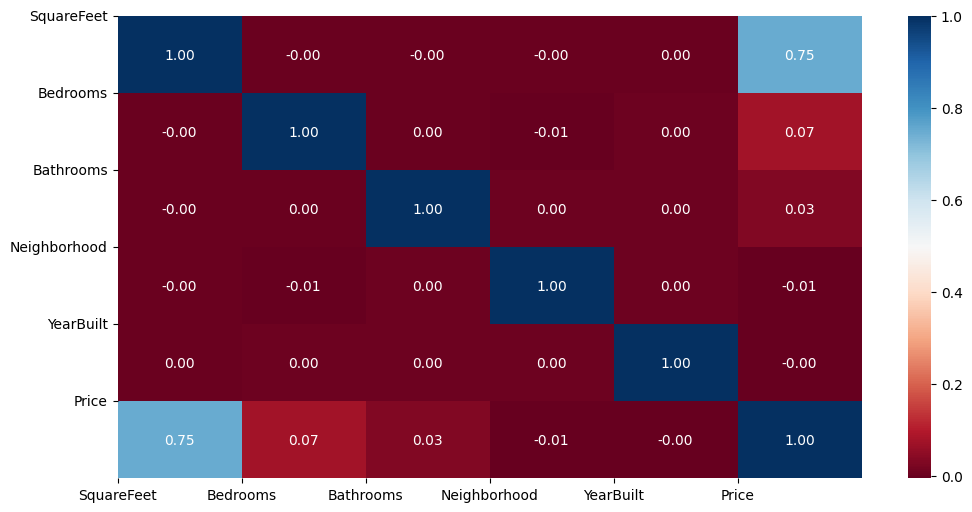

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# ความสัมพันธ์ระหว่างค่าในข้อมูลที่มี
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

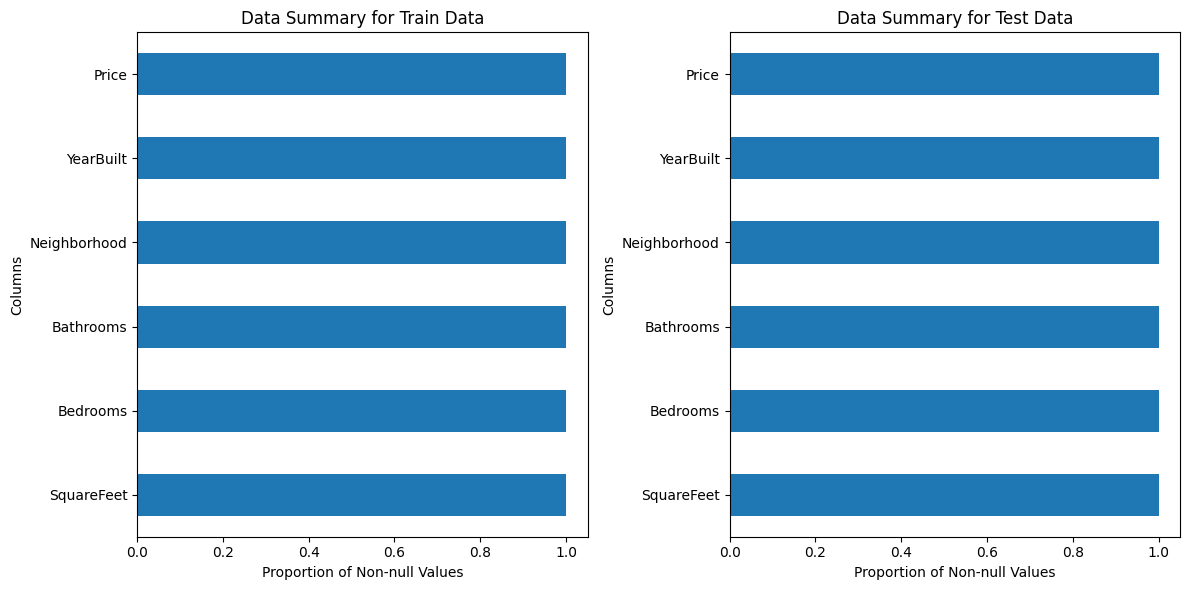

In [11]:
import matplotlib.pyplot as plt

# วิเคราะห์ข้อมูลที่จำเป็น
plt.figure(figsize=(12, 6))

# กราฟเพื่อแสดงข้อมูลจาก DataFrame train
plt.subplot(1, 2, 1)  # กำหนด subplot แรก
plt.title('Data Summary for Train Data')
train.notnull().mean().plot(kind='barh')
plt.xlabel('Proportion of Non-null Values')  # กำหนดชื่อแกน x
plt.ylabel('Columns')  # กำหนดชื่อแกน y

# กราฟเพื่อแสดงข้อมูลจาก DataFrame test
plt.subplot(1, 2, 2)  # กำหนด subplot ที่สอง
plt.title('Data Summary for Test Data')  # กำหนดชื่อกราฟ
test.notnull().mean().plot(kind='barh')
plt.xlabel('Proportion of Non-null Values')  # กำหนดชื่อแกน x
plt.ylabel('Columns')  # กำหนดชื่อแกน y

plt.tight_layout()
plt.show()

In [12]:
# ลบ field ที่เลือกจะทำนาย
train_feature = train.columns.drop('Price').tolist()
train_feature

['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt']

In [13]:
import plotly.express as px

# สรุปข้อมูลสถิติเกี่ยวกับคุณลักษณะ
train[train_feature].describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
        .background_gradient(subset=['std'], cmap='BuPu')\
        .background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
SquareFeet,45000.000000,2006.703911,575.117832,1000.000000,1514.000000,2009.000000,2506.000000,2999.000000
Bedrooms,45000.000000,3.500089,1.115639,2.000000,3.000000,3.000000,4.000000,5.000000
Bathrooms,45000.000000,1.997400,0.815998,1.000000,1.000000,2.000000,3.000000,3.000000
Neighborhood,45000.000000,2.000556,0.816873,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,45000.000000,1985.365333,20.700257,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000


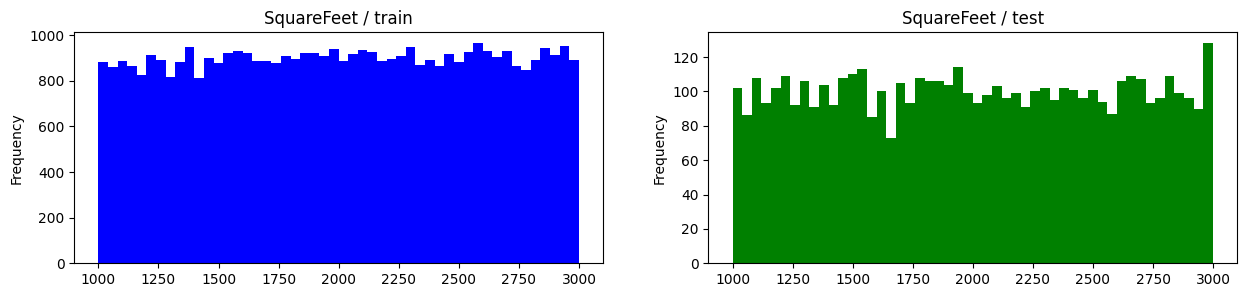

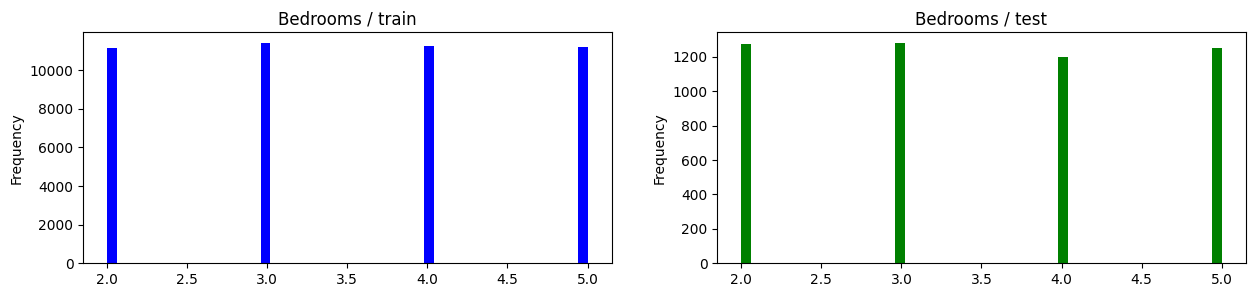

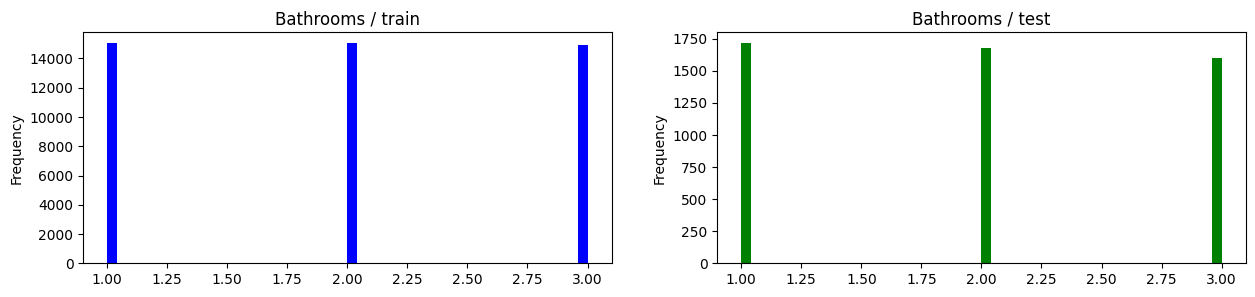

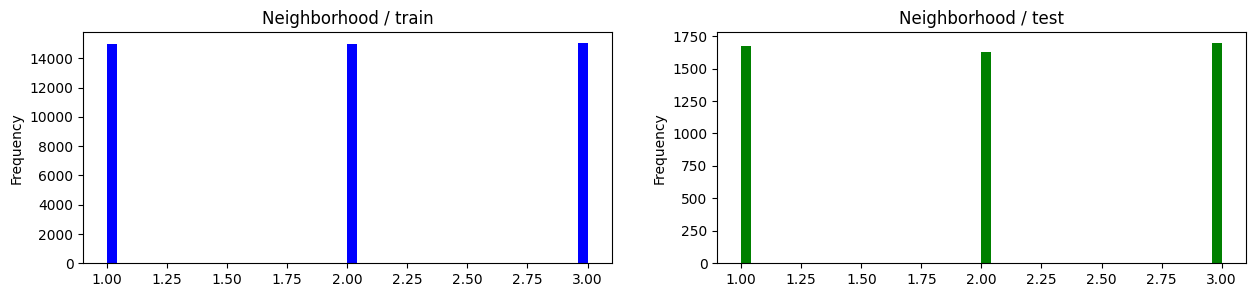

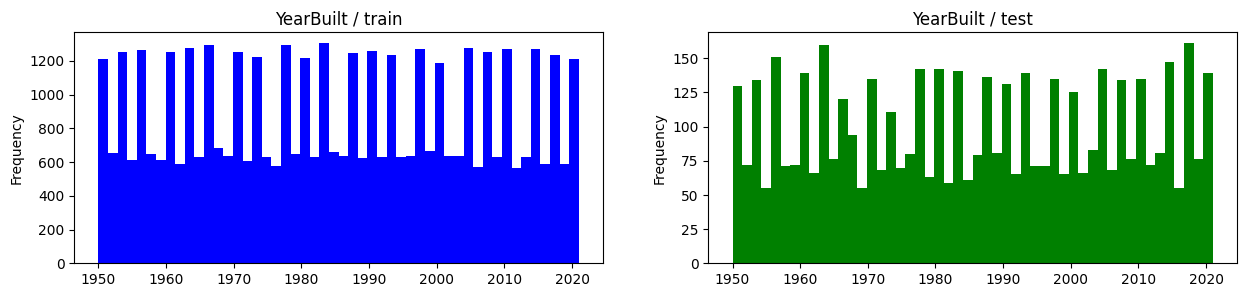

In [14]:
# สร้างกราฟแผนภูมิ histogram สำหรับคุณลักษณะ (features) ที่ระบุใน train_feature
# เพื่อแสดงการกระจายของข้อมูลในชุดข้อมูล train และ test ในแบบ histogram ซึ่งช่วยในการทำความเข้าใจและวิเคราะห์การกระจายของข้อมูลได้ดีขึ้น.
for feat in train_feature:
    plt.figure(figsize=(15,3))
    ax1 = plt.subplot(1,2,1)
    train[feat].plot(kind='hist', bins=50, color='blue')
    plt.title(feat + ' / train')
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    test[feat].plot(kind='hist', bins=50, color='green')
    plt.title(feat + ' / test')
    plt.show()

In [15]:
import_train = train.reset_index(drop=True)
X_data_feature = import_train.drop(columns=['Price'], axis=1)
y_data_feature = train['Price']
X_data_feature

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,2267,2,2,3,1963
1,1706,2,3,1,1956
2,1382,2,2,2,1991
3,1255,5,3,1,1969
4,1451,4,1,3,1971
...,...,...,...,...,...
44995,2166,5,3,3,1996
44996,2463,4,1,2,1953
44997,2812,4,2,2,2010
44998,2188,3,1,2,1979


In [16]:
import pickle
train_model_r2 = []

In [17]:
def calculate_feature_importances(model, X_data_feature, train_feature,name_model):
    model.fit(X_data_feature, y_data_feature)

    feat_importances = pd.Series(model.feature_importances_, index=X_data_feature.columns)
    feat_importances_sorted = feat_importances.nlargest(len(train_feature))

    for feature, importance in feat_importances_sorted.items():
        print(f'Feature: {feature}, Importance: {importance:.3f}')

    print('--------------------------------------')
    y_pred = model.predict(X_data_feature)

    mae = mean_absolute_error(y_data_feature, y_pred)
    mse = mean_squared_error(y_data_feature, y_pred)
    r2 = r2_score(y_data_feature, y_pred)

    print(f'Mean Absolute Error (MAE): {mae:.3f}')
    print(f'Mean Squared Error (MSE): {mse:.3f}')
    print(f'R-squared (R^2): {r2:.3f}')

    train_model_r2.append({
        "model": name_model,
        "r2": r2
    })

    filename = f'/content/{name_model}.sav'
    pickle.dump(model, open(filename, 'wb'))

In [18]:
def calculate_feature_coef(model, X_data_feature, train_feature, name_model):
    model.fit(X_data_feature, y_data_feature)

    feat_importances = pd.Series(model.coef_, index=X_data_feature.columns)
    feat_importances_sorted = feat_importances.nlargest(len(train_feature))

    for feature, importance in feat_importances_sorted.items():
        print(f'Feature: {feature}, Importance: {importance:.3f}')

    print('--------------------------------------')
    y_pred = model.predict(X_data_feature)

    mae = mean_absolute_error(y_data_feature, y_pred)
    mse = mean_squared_error(y_data_feature, y_pred)
    r2 = r2_score(y_data_feature, y_pred)

    train_model_r2.append({
        "model": name_model,
        "r2": r2
    })

    # train_model_r2.append(r2)


    print(f'Mean Absolute Error (MAE): {mae:.3f}')
    print(f'Mean Squared Error (MSE): {mse:.3f}')
    print(f'R-squared (R^2): {r2:.3f}')

    filename = f'/content/{name_model}.sav'
    pickle.dump(model, open(filename, 'wb'))

In [19]:
# Cat Boost
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(verbose=0)
calculate_feature_importances(model_cat,X_data_feature, train_feature , 'model_cat')

Feature: SquareFeet, Importance: 73.600
Feature: YearBuilt, Importance: 11.289
Feature: Bedrooms, Importance: 7.064
Feature: Bathrooms, Importance: 4.339
Feature: Neighborhood, Importance: 3.708
--------------------------------------
Mean Absolute Error (MAE): 38552.525
Mean Squared Error (MSE): 2324709413.222
R-squared (R^2): 0.598


In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
calculate_feature_importances(model_dt,X_data_feature, train_feature, 'model_dt')

Feature: SquareFeet, Importance: 0.741
Feature: YearBuilt, Importance: 0.160
Feature: Neighborhood, Importance: 0.040
Feature: Bathrooms, Importance: 0.034
Feature: Bedrooms, Importance: 0.025
--------------------------------------
Mean Absolute Error (MAE): 228.418
Mean Squared Error (MSE): 9286909.172
R-squared (R^2): 0.998


In [21]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet

model_elasticnet = ElasticNet()
calculate_feature_coef(model_elasticnet,X_data_feature, train_feature, 'model_elasticnet')

Feature: Bedrooms, Importance: 3689.894
Feature: Bathrooms, Importance: 1656.885
Feature: SquareFeet, Importance: 99.162
Feature: YearBuilt, Importance: -10.628
Feature: Neighborhood, Importance: -223.497
--------------------------------------
Mean Absolute Error (MAE): 39996.768
Mean Squared Error (MSE): 2500050101.801
R-squared (R^2): 0.568


In [22]:
# Lasso Regression
from sklearn.linear_model import Lasso

model_lasso = Lasso()
calculate_feature_coef(model_lasso,X_data_feature, train_feature, 'model_lasso')

Feature: Bedrooms, Importance: 5169.540
Feature: Bathrooms, Importance: 2897.217
Feature: SquareFeet, Importance: 99.169
Feature: YearBuilt, Importance: -11.002
Feature: Neighborhood, Importance: -381.861
--------------------------------------
Mean Absolute Error (MAE): 39974.013
Mean Squared Error (MSE): 2496270671.672
R-squared (R^2): 0.569


In [23]:
# Gradient Boosting (LightGBM)
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor()
calculate_feature_importances(model_lgb,X_data_feature, train_feature, 'model_lgb')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 45000, number of used features: 5
[LightGBM] [Info] Start training from score 224891.006346
Feature: SquareFeet, Importance: 1332.000
Feature: YearBuilt, Importance: 818.000
Feature: Bedrooms, Importance: 426.000
Feature: Bathrooms, Importance: 249.000
Feature: Neighborhood, Importance: 175.000
--------------------------------------
Mean Absolute Error (MAE): 39133.895
Mean Squared Error (MSE): 2395904610.820
R-squared (R^2): 0.586


In [24]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
calculate_feature_importances(model_rf,X_data_feature, train_feature, 'model_rf')

Feature: SquareFeet, Importance: 0.742
Feature: YearBuilt, Importance: 0.158
Feature: Neighborhood, Importance: 0.038
Feature: Bathrooms, Importance: 0.034
Feature: Bedrooms, Importance: 0.029
--------------------------------------
Mean Absolute Error (MAE): 15845.789
Mean Squared Error (MSE): 401074120.798
R-squared (R^2): 0.931


In [25]:
# XGB
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
calculate_feature_importances(model_xgb,X_data_feature, train_feature, 'model_xgb')

Feature: SquareFeet, Importance: 0.862
Feature: Bedrooms, Importance: 0.046
Feature: YearBuilt, Importance: 0.031
Feature: Bathrooms, Importance: 0.031
Feature: Neighborhood, Importance: 0.030
--------------------------------------
Mean Absolute Error (MAE): 37022.689
Mean Squared Error (MSE): 2158286105.735
R-squared (R^2): 0.627


In [26]:
train_model_r2

[{'model': 'model_cat', 'r2': 0.5982661290698812},
 {'model': 'model_dt', 'r2': 0.9983951258813921},
 {'model': 'model_elasticnet', 'r2': 0.5679654415284441},
 {'model': 'model_lasso', 'r2': 0.5686185662102761},
 {'model': 'model_lgb', 'r2': 0.5859628613323364},
 {'model': 'model_rf', 'r2': 0.9306902367403282},
 {'model': 'model_xgb', 'r2': 0.6270258007730802}]

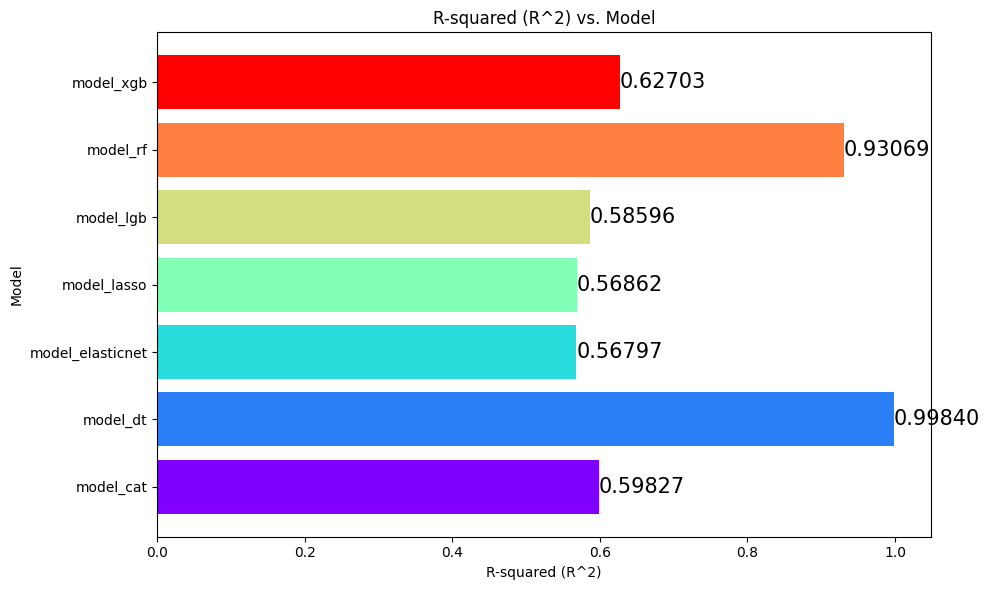

In [27]:
# แยกข้อมูล r2 และ model เพื่อนำมาสร้างกราฟ
r2_values = [item['r2'] for item in train_model_r2]
model_names = [item['model'] for item in train_model_r2]

colors = plt.cm.rainbow(np.linspace(0, 1, len(model_names)))

# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_values, color=colors)
plt.xlabel('R-squared (R^2)')
plt.ylabel('Model')
plt.title('R-squared (R^2) vs. Model')

# แสดงค่า R^2 บนแท่ง
for i, r2 in enumerate(r2_values):
    plt.text(r2, i, f'{r2:.5f}', va='center', fontsize=15)

plt.tight_layout()
plt.show()

# ทดสอบการทำนาย

In [28]:
# รีเซ็ต (ล้าง) ค่าของ index ของ DataFrame และลบ index เดิมทิ้งไปโดยที่ไม่เก็บเป็นคอลัมน์ใหม่
import_test = test.reset_index(drop=True)
import_test = test.drop(columns=['Price'], axis=1)
import_test_len = len(import_test.index)
import_test

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,1894,5,1,1,1975
1,1001,5,3,3,1963
2,2264,4,3,3,1964
3,2299,5,1,3,1999
4,2651,2,1,3,1951
...,...,...,...,...,...
4995,2063,4,2,1,2001
4996,2822,3,2,3,1984
4997,2401,5,1,3,1989
4998,2914,5,1,1,1965


In [29]:
import_reset_train = X_data_feature.reset_index(drop=True)
import_reset_train

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,2267,2,2,3,1963
1,1706,2,3,1,1956
2,1382,2,2,2,1991
3,1255,5,3,1,1969
4,1451,4,1,3,1971
...,...,...,...,...,...
44995,2166,5,3,3,1996
44996,2463,4,1,2,1953
44997,2812,4,2,2,2010
44998,2188,3,1,2,1979


In [30]:
from sklearn.preprocessing import StandardScaler

def preprocess_and_scale(train_data, test_data, feature_names, Row_Number):
    # สร้าง StandardScaler
    scaler = StandardScaler()

    # Fit และทำการแปรผลข้อมูลฝึกอบรม
    train_scaled = scaler.fit_transform(train_data)

    # ทำการแปรผลข้อมูลทดสอบ
    test_scaled = scaler.transform(test_data)

    # สร้าง DataFrame ด้วยข้อมูลที่แปรผลแล้ว
    train_scaled_df = pd.DataFrame(train_scaled, columns=feature_names)
    test_scaled_df = pd.DataFrame(test_scaled, columns=feature_names)

    # เก็บแถวล่าสุด 'Row_Number' ในข้อมูลทดสอบ
    test_scaled_df = test_scaled_df.tail(Row_Number)

    return test_scaled_df

In [31]:
# test_pred_target = preprocess_and_scale(import_reset_train, import_test, train_feature, import_test_len)
# test_pred_target = test_pred_target.reset_index(drop=True)
test_pred_target = import_test.reset_index(drop=True)
test_pred_target

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,1894,5,1,1,1975
1,1001,5,3,3,1963
2,2264,4,3,3,1964
3,2299,5,1,3,1999
4,2651,2,1,3,1951
...,...,...,...,...,...
4995,2063,4,2,1,2001
4996,2822,3,2,3,1984
4997,2401,5,1,3,1989
4998,2914,5,1,1,1965


In [32]:
def make_predictions_and_display(models, model_names, test_data):
    # สร้างรายการเปลี่ยนชื่อคอลัมน์และแต่ละโมเดล
    dfs = []
    for model, name in zip(models, model_names):
        predictions = model.predict(test_data)
        df = pd.DataFrame(predictions, columns=[name])
        dfs.append(df)

    # รวม DataFrames แนวตั้งเป็นแถวเดียว
    combined_df = pd.concat(dfs, axis=1)

    # แสดงผล
    display(combined_df.head())

    # รวมข้อมูลจาก DataFrame test และ predictions โดยใช้ merge
    # merged_data = test.merge(combined_df, how='inner', left_index=True, right_index=True)

    # แสดงผลข้อมูลรวม
    # display(merged_data.head())

    return combined_df

In [33]:
# โหลดโมเดลเพื่อทดสอบการทำนาย
model_cat = pickle.load(open('/content/model_cat.sav', 'rb'))
model_dt = pickle.load(open('/content/model_dt.sav', 'rb'))
model_elasticnet = pickle.load(open('/content/model_elasticnet.sav', 'rb'))
model_lasso = pickle.load(open('/content/model_lasso.sav', 'rb'))
model_lgb = pickle.load(open('/content/model_lgb.sav', 'rb'))
model_rf = pickle.load(open('/content/model_rf.sav', 'rb'))
model_xgb = pickle.load(open('/content/model_xgb.sav', 'rb'))

In [34]:
# รายการโมเดลและรายชื่อของโมเดล
models = [model_cat, model_dt, model_elasticnet, model_lasso, model_lgb, model_rf, model_xgb]
model_names = ['model_cat', 'model_dt', 'model_elasticnet', 'model_lasso', 'model_lgb', 'model_rf', 'model_xgb']

combined_df = make_predictions_and_display(models, model_names, test_pred_target)

,model_cat,model_dt,model_elasticnet,model_lasso,model_lgb,model_rf,model_xgb
0,213068.148640,304004.689866,217930.807372,219074.503699,212453.341869,207487.616508,205105.765625
1,137008.031932,153266.593038,132373.641438,135678.937524,126320.261166,147392.912350,118660.835938
2,255847.734426,305353.999612,253914.465918,255749.389509,253093.258788,278686.364325,256174.109375
3,262262.191720,303800.808384,257389.260042,258210.352092,257239.606508,330730.184826,262115.062500
4,278113.073669,280799.851912,281734.692150,278137.473971,278986.215718,267680.842584,273983.781250


In [35]:
test_pred = test.merge(combined_df, how='inner', left_index=True, right_index=True)
test_pred

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,model_cat,model_dt,model_elasticnet,model_lasso,model_lgb,model_rf,model_xgb
0,1894,5,1,1,1975,170835.035713,213068.148640,304004.689866,217930.807372,219074.503699,212453.341869,207487.616508,205105.765625
1,1001,5,3,3,1963,126913.469998,137008.031932,153266.593038,132373.641438,135678.937524,126320.261166,147392.912350,118660.835938
2,2264,4,3,3,1964,246611.883092,255847.734426,305353.999612,253914.465918,255749.389509,253093.258788,278686.364325,256174.109375
3,2299,5,1,3,1999,244250.462969,262262.191720,303800.808384,257389.260042,258210.352092,257239.606508,330730.184826,262115.062500
4,2651,2,1,3,1951,271127.650112,278113.073669,280799.851912,281734.692150,278137.473971,278986.215718,267680.842584,273983.781250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2063,4,2,1,2001,249452.818594,233623.699771,160755.839532,232379.804218,233275.759073,235040.953228,217587.960668,232957.250000
4996,2822,3,2,3,1984,351909.477011,306844.642280,230251.834815,303687.401461,302799.133841,300013.411199,302252.942057,306299.562500
4997,2401,5,1,3,1989,266759.075008,264606.846665,364288.439839,267610.046750,268435.655570,261079.083257,291019.704248,263199.281250
4998,2914,5,1,1,1965,267997.672951,315430.522790,365181.436341,319182.121514,320337.347028,314060.286173,298558.264102,310679.093750


In [36]:
test_model_r2 = []
def calculate_evaluate_model(model_names, test_pred):
    mse_values = []
    r2_values = []
    for name in model_names:
        # Calculate regression metrics
        mse = mean_squared_error(test_pred['Price'], test_pred[name])
        r2 = r2_score(test_pred['Price'], test_pred[name])

        # print(f'Model: {name}')
        # print(f'Mean Absolute Error (MedAE): {medAE:.3f}')
        # print(f'R-squared (R^2): {r2:.3f}')
        # print('------------------')

        # เก็บค่าเมตริกส์เพื่อนำไปใช้ในกราฟ
        mse_values.append(mse)
        r2_values.append(r2)
        test_model_r2.append({
        "model": name,
        "r2": r2
        })
        # test_model_r2.append(r2)

    # สร้างกราฟเปรียบเทียบค่า Mse และเปลี่ยนสีแท่ง
    # plt.figure(figsize=(12, 4))
    # plt.subplot(1, 2, 1)
    # plt.barh(model_names, mse_values, color=colors)
    # plt.xlabel('Mean Absolute Error (Mse)')
    # plt.title('Model Evaluation Metrics - Mse')

    # สร้างกราฟเปรียบเทียบค่า R^2 และเปลี่ยนสีแท่ง
    # plt.subplot(1, 2, 2)
    plt.figure(figsize=(10, 6))
    plt.barh(model_names, r2_values, color=colors)
    plt.xlabel('R-squared (R^2)')
    plt.title('Model Evaluation Metrics - R^2')
    # print('r2_values',r2_values)

    for i, value in enumerate(r2_values):
        plt.text(value + 0.01, i, f'{value:.5f}', va='center', fontsize=15)

    # print('test_model_r2',test_model_r2)
    plt.tight_layout()
    plt.show()

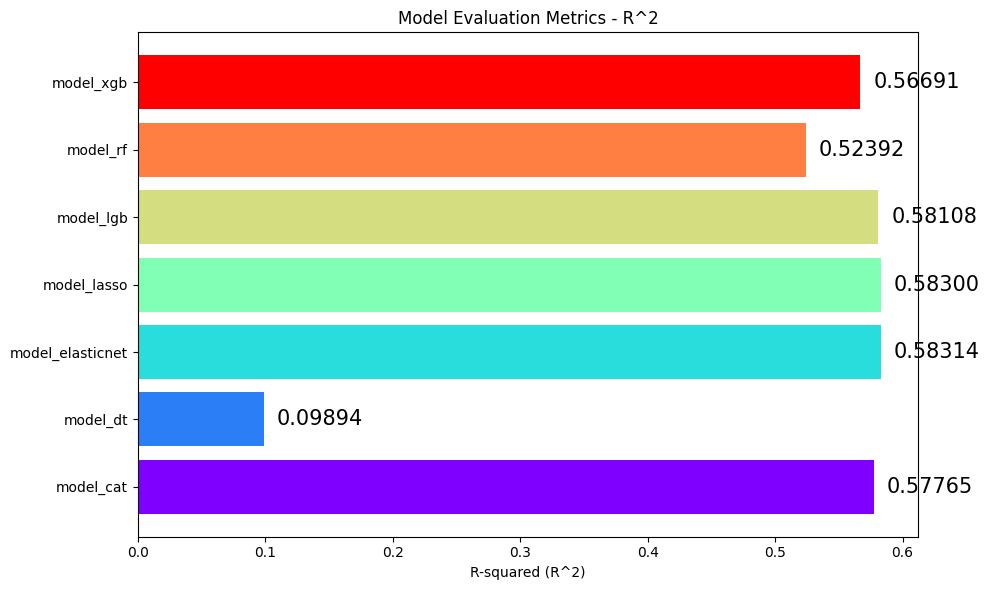

In [37]:
calculate_evaluate_model(model_names, test_pred)

In [38]:
print('train_model_r2',train_model_r2)
print('test_model_r2',test_model_r2)

train_model_r2 [{'model': 'model_cat', 'r2': 0.5982661290698812}, {'model': 'model_dt', 'r2': 0.9983951258813921}, {'model': 'model_elasticnet', 'r2': 0.5679654415284441}, {'model': 'model_lasso', 'r2': 0.5686185662102761}, {'model': 'model_lgb', 'r2': 0.5859628613323364}, {'model': 'model_rf', 'r2': 0.9306902367403282}, {'model': 'model_xgb', 'r2': 0.6270258007730802}]
test_model_r2 [{'model': 'model_cat', 'r2': 0.577647588424308}, {'model': 'model_dt', 'r2': 0.09894162928448536}, {'model': 'model_elasticnet', 'r2': 0.5831366148056656}, {'model': 'model_lasso', 'r2': 0.5829960287166415}, {'model': 'model_lgb', 'r2': 0.5810786684232581}, {'model': 'model_rf', 'r2': 0.5239162743169246}, {'model': 'model_xgb', 'r2': 0.5669138359988557}]


In [39]:
# Remove key
train_r2 = [item['r2'] for item in train_model_r2]
print("train_r2:", train_r2)
test_r2 = [item['r2'] for item in test_model_r2]
print("test_r2:", test_r2)

train_r2: [0.5982661290698812, 0.9983951258813921, 0.5679654415284441, 0.5686185662102761, 0.5859628613323364, 0.9306902367403282, 0.6270258007730802]
test_r2: [0.577647588424308, 0.09894162928448536, 0.5831366148056656, 0.5829960287166415, 0.5810786684232581, 0.5239162743169246, 0.5669138359988557]


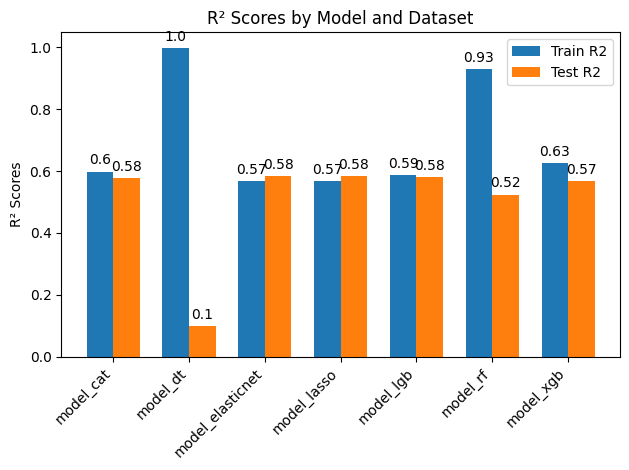

In [40]:
# กำหนดข้อมูล
models = ['model_cat', 'model_dt', 'model_elasticnet', 'model_lasso', 'model_lgb', 'model_rf', 'model_xgb']

# คำนวณเปอร์เซ็นต์ความแตกต่างของคะแนน R2 ระหว่างชุดการฝึกและทดสอบเป็นวิธีการวัดการเสีย
overfitting_percentage = [(train - test) / train * 100 for train, test in zip(train_r2, test_r2)]

# กำหนดตำแหน่งแกน x สำหรับกลุ่ม
x = np.arange(len(models))

# พล็อตคะแนน R2 ของการฝึกและทดสอบ
width = 0.35  # ความกว้างของแถบ

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_r2, width, label='Train R2')
rects2 = ax.bar(x + width/2, test_r2, width, label='Test R2')

# เพิ่มข้อความสำหรับป้ายชื่อ ชื่อเรื่อง และป้ายกำกับแกน x แบบกำหนดเอง เป็นต้น
ax.set_ylabel('R² Scores')
ax.set_title('R² Scores by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# แนบป้ายข้อความเหนือแต่ละแถบใน *rects* เพื่อแสดงความสูงของแถบนั้น
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # การขยับแนวดิ่ง 3 จุด
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [41]:
# คำนวณเปอร์เซ็นต์ความแตกต่างของคะแนน R2 ระหว่างชุดการฝึกและทดสอบเป็นวิธีการวัดการเสีย
overfitting_percentage_with_names = {model: percent for model, percent in zip(models, overfitting_percentage)}
overfitting_percentage_with_names

{'model_cat': 3.4463827456902294,
 'model_dt': 90.08993266096539,
 'model_elasticnet': -2.671143729518924,
 'model_lasso': -2.528489810346536,
 'model_lgb': 0.8335328450634082,
 'model_rf': 43.70669706905904,
 'model_xgb': 9.58684071693869}

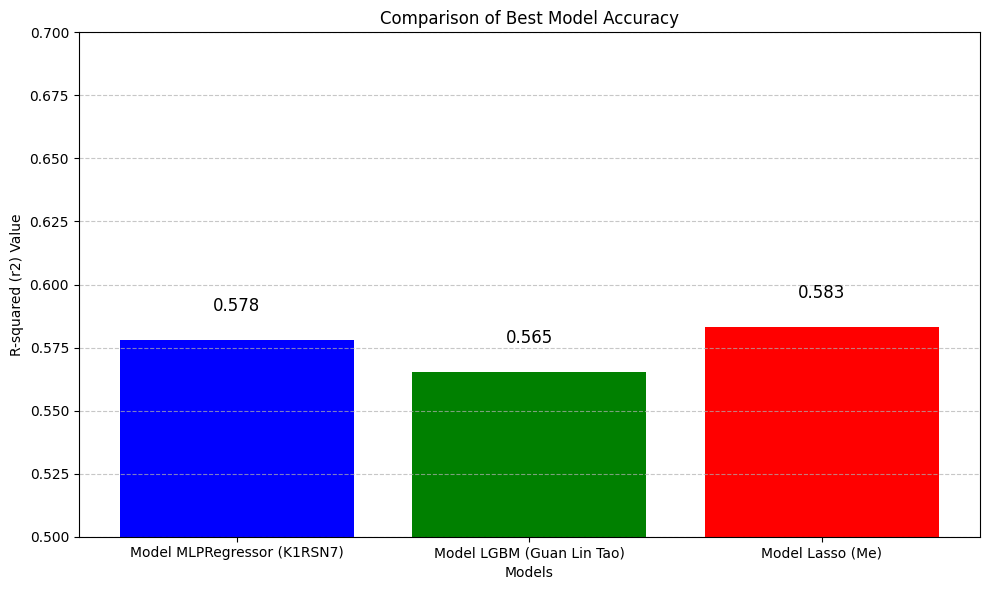

In [42]:
models = ['Model MLPRegressor (K1RSN7)', 'Model LGBM (Guan Lin Tao)', 'Model Lasso (Me)']
r2_values = [0.5780038399547984, 0.565330, 0.5829960287166415]

# Create a bar chart to compare R-squared values
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.ylim(0.5, 0.7)  # Set y-axis limits based on your data range
plt.xlabel('Models')
plt.ylabel('R-squared (r2) Value')
plt.title('Comparison of Best Model Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with their respective values
for i, r2 in enumerate(r2_values):
    plt.text(i, r2 + 0.01, f'{r2:.3f}', ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.savefig('model_comparison.png')  # Save the plot as an image
plt.show()